Problem Statement: Study employee productivity in WFH vs WFO.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data = pd.read_csv('WFH_WFO_dataset.csv', index_col= 'ID')

In [68]:
data.shape

(207, 18)

In [69]:
data.head()

,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
ID,,,,,,,,,,,,,,,,,,
1,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
2,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
3,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
4,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
5,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 1 to 207
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Name                         207 non-null    object
 1   Age                          207 non-null    int64 
 2   Occupation                   207 non-null    object
 3   Gender                       207 non-null    object
 4   Same_ofiice_home_location    207 non-null    object
 5   kids                         207 non-null    object
 6   RM_save_money                207 non-null    object
 7   RM_quality_time              207 non-null    object
 8   RM_better_sleep              207 non-null    object
 9   calmer_stressed              207 non-null    object
 10  RM_professional_growth       207 non-null    int64 
 11  RM_lazy                      207 non-null    int64 
 12  RM_productive                207 non-null    int64 
 13  digital_connect_sufficient   207 no

In [71]:
data.describe()

,Age,RM_professional_growth,RM_lazy,RM_productive,RM_better_work_life_balance,RM_improved_skillset,Target
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,29.666667,3.086957,3.101449,3.623188,3.043478,3.521739,0.405797
std,8.506993,1.089301,1.255801,0.996617,1.247539,1.004002,0.492236
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,25.000000,2.000000,2.000000,3.000000,2.000000,3.000000,0.000000
50%,26.000000,3.000000,3.000000,4.000000,3.000000,3.000000,0.000000
75%,29.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,57.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [72]:
data.drop_duplicates(ignore_index=True)

,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
0,Bhavana,45,Tutor,Female,Yes,Yes,Yes,Yes,Yes,CALMER,5,1,5,Yes,5,5,Yes,1
1,Harry,24,Tutor,Male,No,No,No,No,No,CALMER,2,2,2,No,3,3,No,1
2,Banditaa,53,HR,Female,Yes,Yes,Yes,Yes,Yes,CALMER,3,3,4,No,5,3,No,1
3,Neetha,26,Engineer,Female,Yes,No,Yes,Yes,No,STRESSED,3,4,4,No,4,5,Yes,0
4,Ram,26,Recruiter,Male,Yes,No,No,Yes,No,STRESSED,3,3,5,Yes,4,2,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Louis,28,Manager,Male,Yes,No,No,No,No,STRESSED,2,4,3,No,2,5,Not sure,0
179,Nandini,32,Engineer,Female,Yes,Yes,Yes,Yes,Yes,CALMER,4,1,5,Yes,3,3,Not sure,1
180,Matt,52,Business,Male,Yes,Yes,Yes,Yes,Yes,CALMER,4,4,4,Yes,5,3,No,1
181,Rithik,22,Marketing,Male,Yes,No,Yes,Yes,No,STRESSED,4,4,4,No,4,3,Not sure,0


In [73]:
data['RM_productive'].value_counts()

4    69
3    66
5    45
2    24
1     3
Name: RM_productive, dtype: int64

In [74]:
data['Occupation'].unique()

array(['Tutor', 'HR', 'Engineer', 'Recruiter', 'Business', 'Marketing ',
       'Manager'], dtype=object)

In [75]:
data['Occupation'].value_counts()

Engineer      51
Tutor         30
Manager       29
HR            26
Business      26
Marketing     26
Recruiter     19
Name: Occupation, dtype: int64

In [76]:
data['Target'].value_counts()

0    123
1     84
Name: Target, dtype: int64

In [77]:
data['calmer_stressed'].value_counts()

STRESSED    126
CALMER       81
Name: calmer_stressed, dtype: int64

EDA

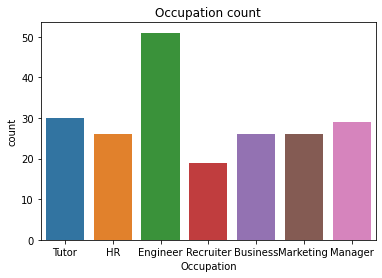

In [78]:
ax=sns.countplot(x='Occupation',data=data)
plt.title("Occupation count")
ax

Text(0.5, 1.0, 'Male vs Female')

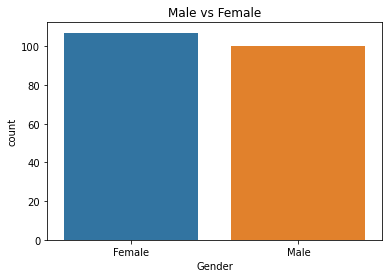

In [79]:
sns.countplot(x='Gender',data=data)
plt.title('Male vs Female')


([<matplotlib.patches.Wedge at 0x1cc94f23fa0>,
 [Text(0.5499999702695115, 0.9526279613277875, '4'),
  Text(-1.098860046242398, 0.0500659442351283, '3'),
  Text(0.07506679095569799, -1.0974356367895175, '5'),
  Text(0.9879405284079203, -0.48370808586282626, '2'),
  Text(1.098860046828337, -0.050065931374790734, '1')])

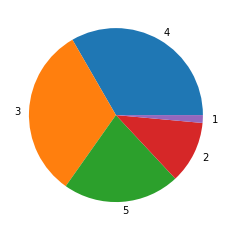

In [93]:
plt.pie(data['RM_productive'].value_counts().values,labels = data['RM_productive'].value_counts().index)

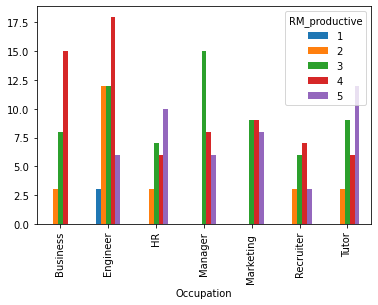

In [120]:
data.groupby('Occupation')['RM_productive'].value_counts().unstack().plot(kind='bar')

Text(0.5, 1.0, 'Violinplot for RM_productive with respect to occupation and gender')

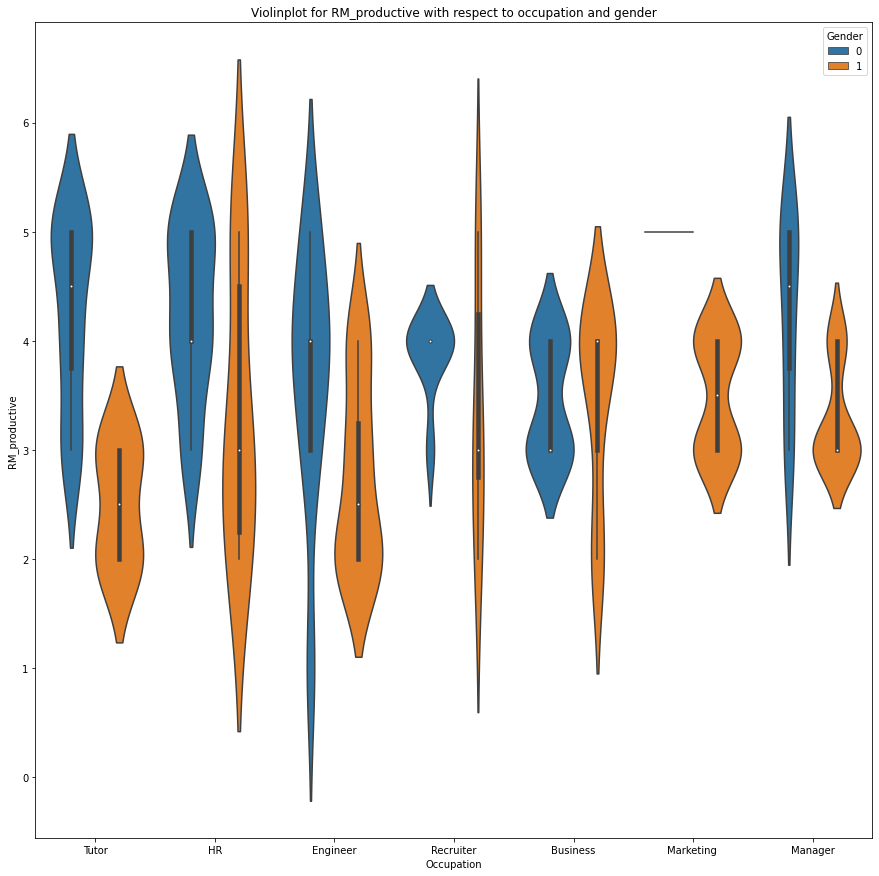

In [125]:
plt.figure(figsize = (15,15))
sns.violinplot(x = 'Occupation', y='RM_productive',hue = 'Gender',data = data).set_title('Violinplot for RM_productive with respect to occupation and gender')
#0 - Female

In [126]:
from statsmodels.graphics.mosaicplot import mosaic

ValueError: at least one proportion should be greater than zero

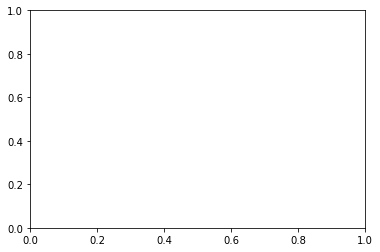

In [128]:
mosaic(data, ['Occupation','RM_productive','RM_lazy','RM_better_work_life_balance','RM_better_sleep'])

In [127]:
data.columns

Index(['Name', 'Age', 'Occupation', 'Gender', 'Same_ofiice_home_location',
       'kids', 'RM_save_money', 'RM_quality_time', 'RM_better_sleep',
       'calmer_stressed', 'RM_professional_growth', 'RM_lazy', 'RM_productive',
       'digital_connect_sufficient', 'RM_better_work_life_balance',
       'RM_improved_skillset', 'RM_job_opportunities', 'Target'],
      dtype='object')

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
features = ['Gender','Same_ofiice_home_location','kids','RM_save_money','RM_quality_time','RM_better_sleep','RM_job_opportunities','calmer_stressed']

In [82]:
encode = LabelEncoder()

In [83]:
data[features] = data[features].apply(LabelEncoder().fit_transform)

In [84]:
data.head()

,Name,Age,Occupation,Gender,Same_ofiice_home_location,kids,RM_save_money,RM_quality_time,RM_better_sleep,calmer_stressed,RM_professional_growth,RM_lazy,RM_productive,digital_connect_sufficient,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target
ID,,,,,,,,,,,,,,,,,,
1,Bhavana,45,Tutor,0,1,1,1,1,1,0,5,1,5,Yes,5,5,2,1
2,Harry,24,Tutor,1,0,0,0,0,0,0,2,2,2,No,3,3,0,1
3,Banditaa,53,HR,0,1,1,1,1,1,0,3,3,4,No,5,3,0,1
4,Neetha,26,Engineer,0,1,0,1,1,0,1,3,4,4,No,4,5,2,0
5,Ram,26,Recruiter,1,1,0,0,1,0,1,3,3,5,Yes,4,2,2,1


In [85]:
data['RM_job_opportunities'].value_counts()

1    87
2    75
0    45
Name: RM_job_opportunities, dtype: int64